# Анализ и прогнозирование временных рядов методами искусственного интеллекта

## **Практическая работа 6. Поиск эволюционирующих шаблонов с помощью матричного профиля ряда.**

In [1]:
%load_ext autoreload
%autoreload 2

## **Часть 1.** Поиск цепочек временного ряда.

Импорт библиотек и модулей

In [3]:
!pip install stumpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 169.1/169.1 kB 3.6 MB/s eta 0:00:00


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import stumpy
from sklearn.metrics import mean_squared_error

В первом задании вам предстоит выполнить поиск эволюционирующих шаблонов временного ряда. Выполните считывание набора данных [Rotation Matrix](datasets/Rotation%20Matrix.txt), найдите в нем самую длинную цепочку и выведите индексы начала звеньев этой цепочки.

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
import os
os.chdir('/content/drive/MyDrive/2023-Bastrykina-TimeSeriesCourse/practice/06 Chains')

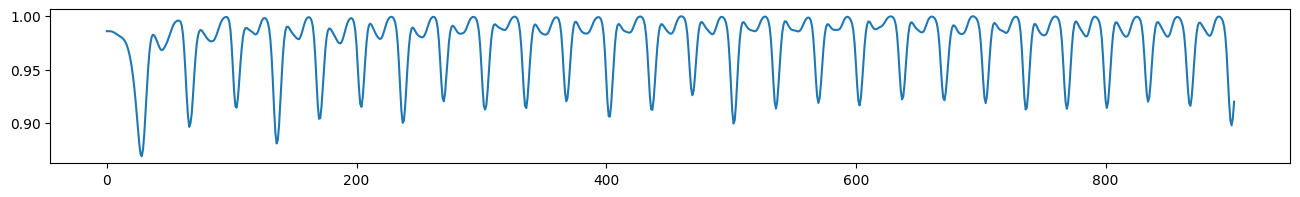

In [7]:
fig, ax = plt.subplots(figsize=(16, 2))
ts = np.loadtxt('datasets/Rotation Matrix.txt')
ax.plot(ts)

In [8]:
m = 25
mp = stumpy.stump(ts, m=m)
all_chain_set, unanchored_chain = stumpy.allc(mp[:, 2], mp[:, 3])
unanchored_chain

array([199, 331, 398, 432, 863])

❓ Проанализируйте и изложите содержательный смысл полученных результатов.

Цепочка состоит из 5 звеньев

## **Часть 2. Визуализация цепочек**

Выполните визуализацию найденных в прошлом задании цепочек: постройте график временного ряда, на котором выделены звенья цепочек. Также постройте график, на котором изображены только сами звенья.

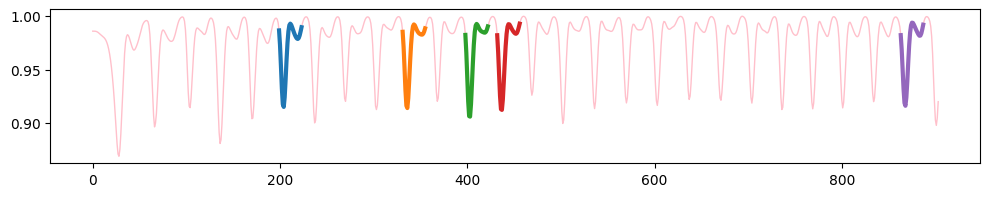

In [10]:
fig, ax = plt.subplots(figsize=(12, 2))
ax.plot(ts, linewidth=1, color='pink')
for i in range(unanchored_chain.shape[0]):
    y = ts[unanchored_chain[i]:unanchored_chain[i]+m]
    x = range(unanchored_chain[i], unanchored_chain[i]+m)
    plt.plot(x, y, linewidth=3)

plt.show()

❓ Проанализируйте и изложите содержательный смысл полученных результатов.

Звенья отличаются дуг от другой амплитудой, но схожи по форме

## **Часть 3.** Предсказывание значений ряда на основе цепочек.

Предскажите значения последнего звена цепочки, вычислив разность между двумя предыдущими звеньями цепочки. Сравните полученное предсказание с истинным значением.

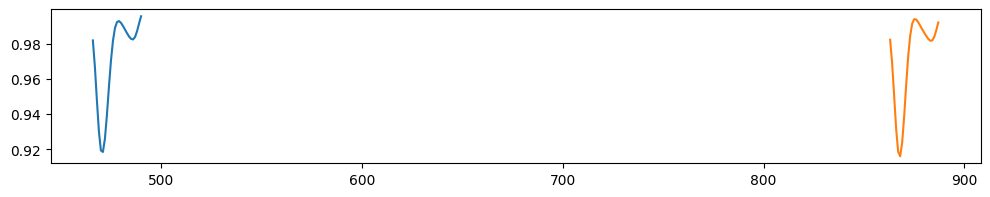

In [12]:
last_chain_index = unanchored_chain[-1]
last_chain_index
last_chain_y = ts[last_chain_index:last_chain_index+m]
last_chain_x = np.array(range(last_chain_index, last_chain_index+m))
last_chain_x

chain_index1 = unanchored_chain[-2]
chain_index2 = unanchored_chain[-3]

chain1_y = ts[chain_index1:chain_index1+m]
chain1_x = np.array(range(chain_index1, chain_index1+m))
chain2_y = ts[chain_index2:chain_index2+m]
chain2_x = np.array(range(chain_index2, chain_index2+m))

pred_chain_y = chain1_y + (chain1_y-chain2_y)
pred_chain_x = chain1_x + (chain1_x-chain2_x)

fig, ax = plt.subplots(figsize=(12, 2))
for x, y in [(pred_chain_x, pred_chain_y), (last_chain_x, last_chain_y)]:
    plt.plot(x, y)
plt.show()

❓ Проанализируйте и изложите содержательный смысл полученных результатов.